# ***Video Games Visualization*** 

## **About the Dataset**

| **Column** | **Data Type** | **Description** |
| --- | --- | --- |
| Rank | Integer | Ranking of sales |
| Name | Object | Name of the game |
| Platform | Object | Platform where the game was released |
| Year | Float | Year when the game was released |
| Genre | Object | Genre of the game |
| Publisher | Object | Publisher of the game |
| NA_Sales | Float | Sales in North America (in million copies) |
| EU_Sales | Float | Sales in Europe (in million copies) |
| JP_Sales | Float | Sales in Japan (in million copies) |
| Other_Sales | Float | Sales in other regions (in million copies) |
| Global_Sales | Float | Overall sales (in million copies) |

There are 16598 rows and 11 columns overall.

In [1]:
# Import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data

data=pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Data can be downloaded at https://www.kaggle.com/datasets/gregorut/videogamesales

In [3]:
# Create copy

df1=data.copy()
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Drop Rank column

df1.drop(['Rank'], axis=1, inplace = True)
df1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Data info

print('\033[1m Data Info\033[0m')
print(df1.info())
print()
print('\033[1m Missing Values \033[0m')
print(df1.isna().sum())

 Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB
None

 Missing Values 
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


There are 271 missing values in the 'Year' column and 58 missing values in the 'Publisher' column. Let's drop them.

In [6]:
# Drop missing values

df1.dropna(inplace=True)

print('\033[1m Data Info\033[0m')
print(df1.info())
print()
print('\033[1m Missing Values \033[0m')
print(df1.isna().sum())

 Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None

 Missing Values 
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [7]:
# Drop games that were released in 2017 and 2020

df1.drop(df1[df1['Year'].isin([2017, 2020])].index,inplace=True)

I drop the games that were released in 2017 and 2020 too, since there are only 4 records of them in total.

In [8]:
# Change the Year column data type to integer

df1['Year']=df1['Year'].astype(int, errors='ignore')

In [9]:
df1.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# By Year

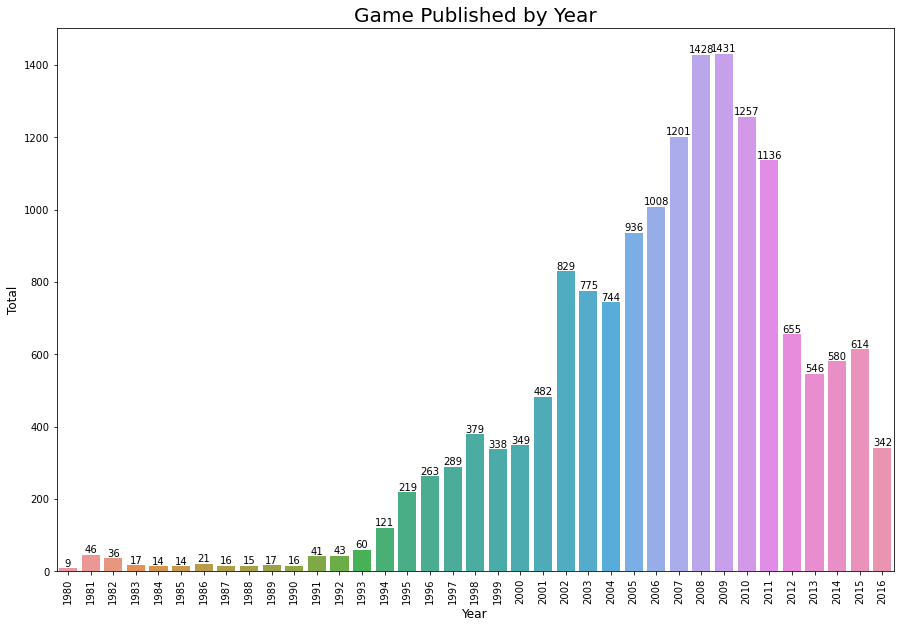

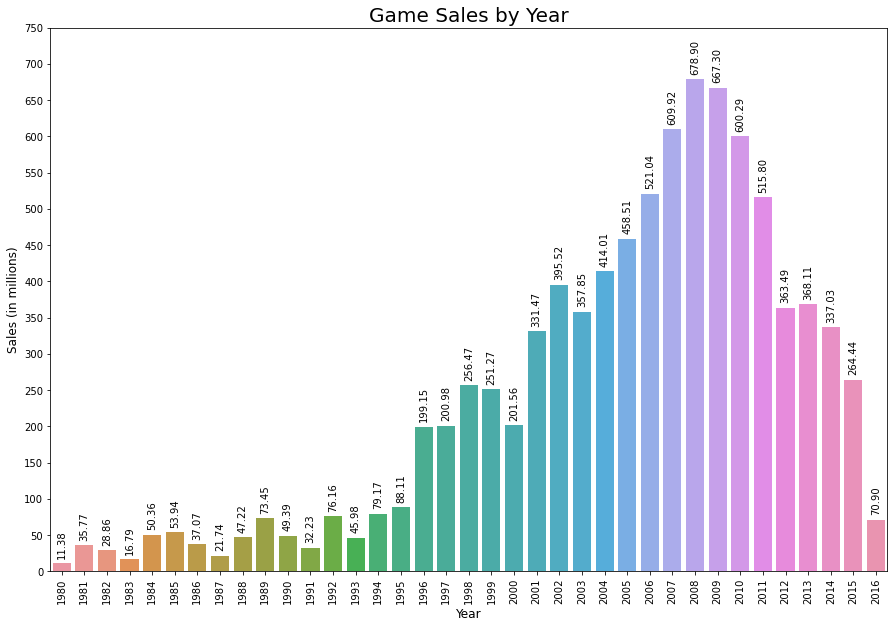

In [10]:
plt.figure(figsize=(15,10))
chart1=sns.countplot(x='Year',data=df1, order=df1['Year'].value_counts().sort_index(ascending=True).index)
chart1.bar_label(chart1.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.xlabel('Year', size = 12)
plt.ylabel('Total', size = 12)
plt.title ('Game Published by Year', size = 20)

dfy1=df1.groupby(df1['Year']).sum().sort_index(ascending=True).reset_index()
plt.figure(figsize=(15,10))
sales_year=sns.barplot(x='Year', y='Global_Sales',data=dfy1)
sales_year.bar_label(sales_year.containers[0], label_type='edge',fmt='%.2f',rotation=90,padding=5)
plt.xticks(rotation=90)
plt.xlabel('Year', size = 12)
plt.ylabel('Sales (in millions)', size = 12)
plt.yticks(range(0,800,50))
plt.title ('Game Sales by Year', size = 20)

plt.show()

Apparently, the number of games published started to rise in 1994 and peaked in the 2008–2009 period, and then it took a nosedive starting in 2010. Why's that, though? The theory from Kotaku (https://kotaku.com/2022-year-review-blockbuster-game-awards-cod-fortnite-1849856453) is that games became increasingly complicated, big, and took longer to develop. This is mostly applied to blockbuster games, but we can see the effect here.

The game sales graph is similar to the published game graph. The more games published, the more sales they generate (duh). The interesting case here is that game sales peaked in 2008, when one of the worst financial crises happened.

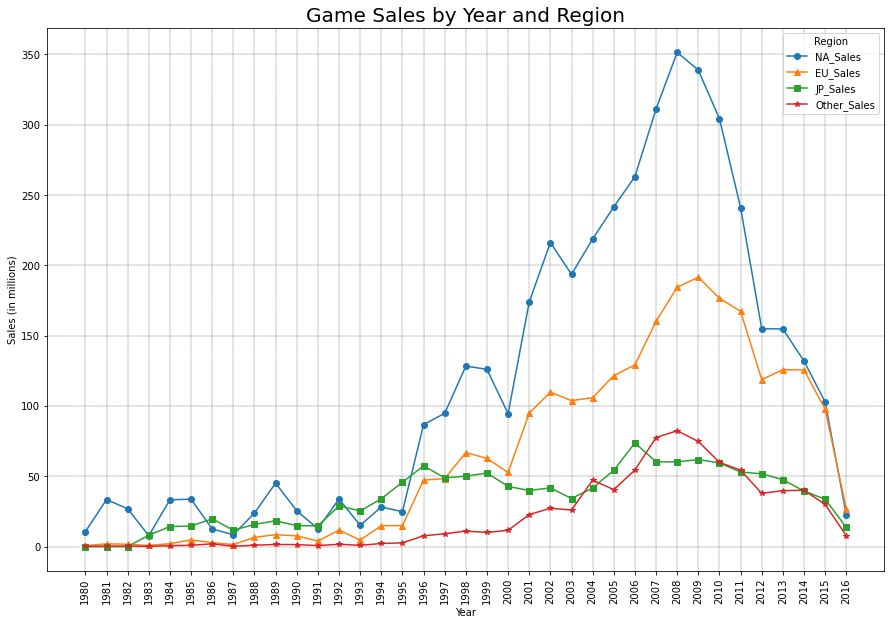

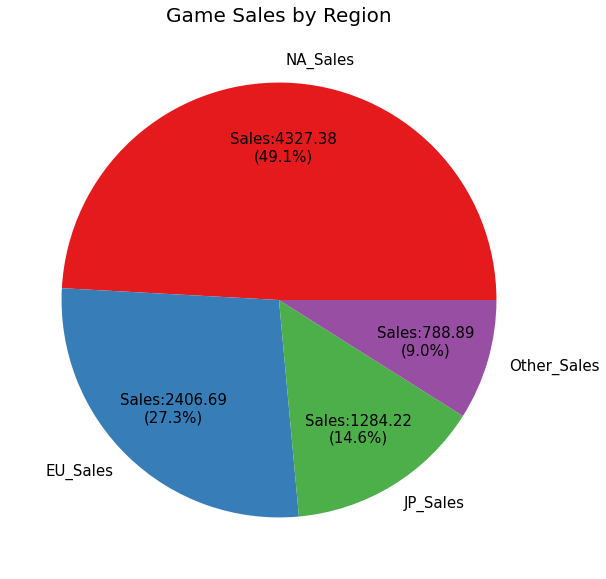

In [11]:
plt.figure(figsize=(15,10))
x=dfy1['Year']
y1=dfy1['NA_Sales']
y2=dfy1['EU_Sales']
y3=dfy1['JP_Sales']
y4=dfy1['Other_Sales']
plt.plot(x, y1, label ='NA_Sales',marker='o')
plt.plot(x, y2, label ='EU_Sales',marker='^')
plt.plot(x, y3, label ='JP_Sales',marker='s')
plt.plot(x, y4, label ='Other_Sales',marker='*')
plt.xlabel("Year")
plt.xticks(range(1980,2017,1),rotation=90)
plt.ylabel("Sales (in millions)")
plt.legend(title='Region')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.3)
plt.title('Game Sales by Year and Region',size = 20)

regionsales=df1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = round((pct*total/100.0),2)
            return 'Sales:{v}\n({:.1f}%)'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(regionsales,autopct=autopct_format(regionsales),
        labels=regionsales.index, textprops={'fontsize': 15},
        colors=sns.color_palette('Set1'),pctdistance=0.7)
plt.title ('Game Sales by Region', size = 20)

plt.show()

As we can see in the graph, the huge global sales peak in the 1996–2009 period is mostly attributed to North American and European sales. Japanese video game sales went up in the 1994-1996 period too, but pretty much stagnated after that.

To elaborate further, we found that North American sales account for almost half of global sales, and western markets (NA and EU) account for 76.4% of global sales. So, overall game sales are very dependent on these two regions.

In [12]:
ny=df1.groupby(by=['Year','Name','Platform'])['Global_Sales'].sum().reset_index()
ny1=ny.groupby(by=['Year'])['Global_Sales'].transform(max)==ny['Global_Sales']
ny2=ny[ny1].reset_index()

Text(0, 0.5, 'Sales (in millions)')

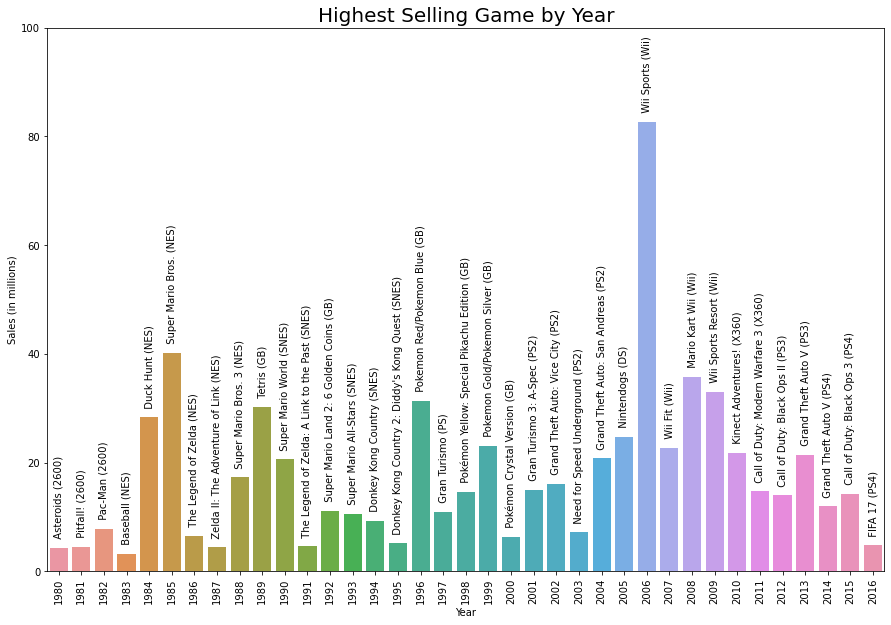

In [13]:
plt.figure(figsize=(15,10))
nameyear=sns.barplot(x='Year',y='Global_Sales',ci=None, data=ny2.reset_index())
labels = [f'  {ny2.iloc[i, 2]} ({ny2.iloc[i, 3]})' for i, v in enumerate(nameyear.containers[0])]
nameyear.bar_label(nameyear.containers[0], labels = labels, rotation=90, padding=3, fontsize=10)
plt.xticks(rotation=90)
plt.yticks(range(0,120,20))
plt.title('Highest Selling Game by Year', size = 20)
plt.ylabel('Year', size = 10)
plt.ylabel('Sales (in millions)', size = 10)

Even though video game sales are increasing, there are 1980s and 1990s games that are still going strong in terms of sales. Most of those are games that have already achieved legendary status. Duck Hunt, Super Mario Bros., Tetris, and Pokemon are games that are familiar to everyone, including non-gamers.

Still, Wii Sports sales outperform pretty much everyone by a large margin.

Wii Sports is a 2006 sports simulation video game developed and published by Nintendo for the Wii video game console. Wii Sports is a collection of five sports simulations, which have been designed to demonstrate the motion-sensing capabilities of the Wii Remote. The five sports included are tennis, baseball, bowling, golf, and boxing (https://en.wikipedia.org/wiki/Wii_Sports). This kind of game is perfect for social gatherings and is very accessible to anyone, so it becomes a major worldwide success.

# By Genre

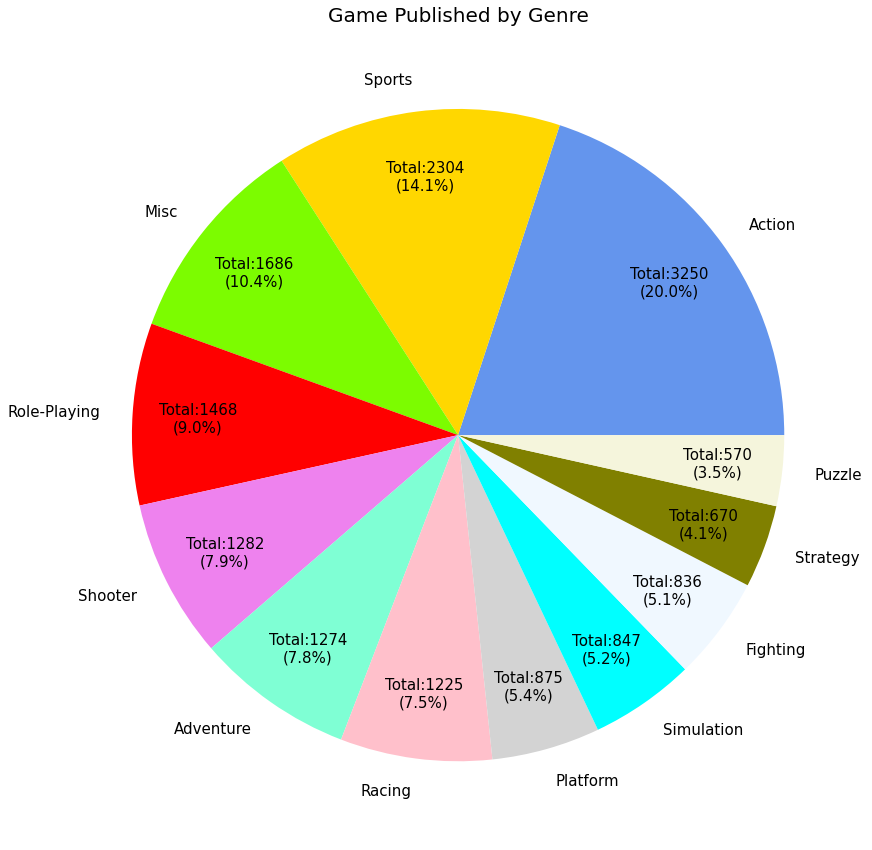

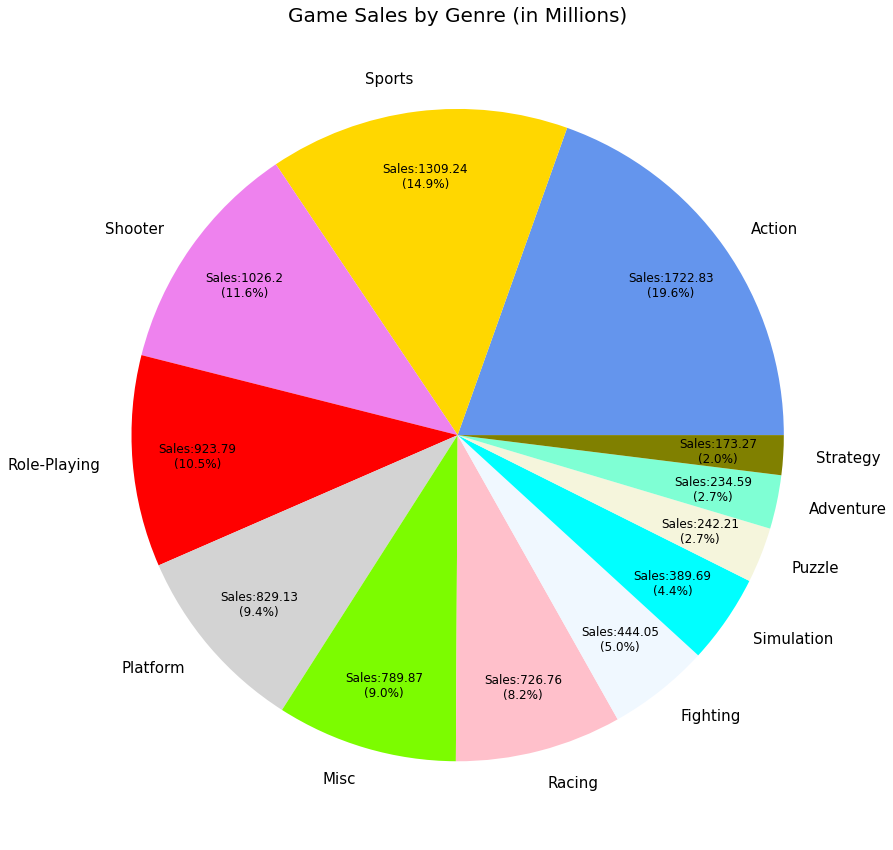

In [14]:
colors={'Action':'cornflowerblue',
        'Sports':'gold',
        'Misc':'lawngreen',
        'Role-Playing':'red',
        'Shooter':'violet',
        'Adventure':'aquamarine',
        'Racing':'pink',
        'Platform':'lightgrey',
        'Simulation':'cyan',
        'Fighting':'aliceblue',
        'Strategy':'olive',
        'Puzzle':'beige'}

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return 'Total:{v:d}\n({:.1f}%)'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,15))
plt.pie(df1['Genre'].value_counts(),autopct=autopct_format(df1['Genre'].value_counts()),
        labels=df1['Genre'].value_counts().index, textprops={'fontsize': 15},
        colors=[colors[v] for v in df1['Genre'].value_counts().index],pctdistance=0.8)
plt.title ('Game Published by Genre', size = 20)

dfc1=df1.groupby(df1['Genre']).sum().sort_values('Global_Sales',ascending=False)
def autopct_format1(values):
        def my_format(pct):
            total = sum(values)
            val = round((pct*total/100.0),2)
            return 'Sales:{v}\n({:.1f}%)'.format(pct, v=val)
        return my_format
plt.figure(figsize=(15,15))
w,l,p= plt.pie(dfc1['Global_Sales'],autopct=autopct_format1(dfc1['Global_Sales']),
        labels=dfc1.index, textprops={'fontsize': 12},colors=[colors[v] for v in dfc1.index]
       ,pctdistance=0.8,labeldistance=1.1)
plt.setp(l, fontsize=15)
plt.title ('Game Sales by Genre (in Millions)', size = 20)

plt.show()

The most published genre is Action, followed by Sports, Misc, and Role-Playing.

The genre with the most sales generated is Action, followed by Sports, Shooter, and Role-Playing. The interesting thing is that the Misc genre only contributed 9.0% of overall sales, despite accounting for 10.4% of total games published.

In [15]:
pyg1=df1.groupby(by=['Year','Genre'])['Global_Sales'].count().reset_index()
pyg2=pyg1.groupby(by=['Year'])['Global_Sales'].transform(max)==pyg1['Global_Sales']
pyg3=pyg1[pyg2].reset_index()
pyg4=pyg3.groupby('Year').first()

In [16]:
syg1=df1.groupby(by=['Year','Genre'])['Global_Sales'].sum().reset_index()
syg2=syg1.groupby(by=['Year'])['Global_Sales'].transform(max)==syg1['Global_Sales']
syg3=syg1[syg2].reset_index()

Text(0, 0.5, 'Sales (in millions)')

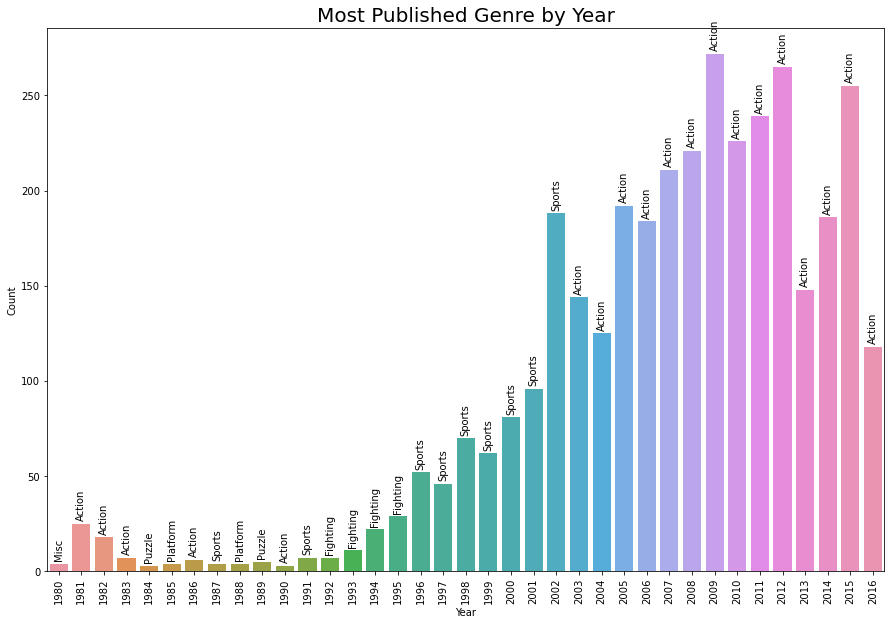

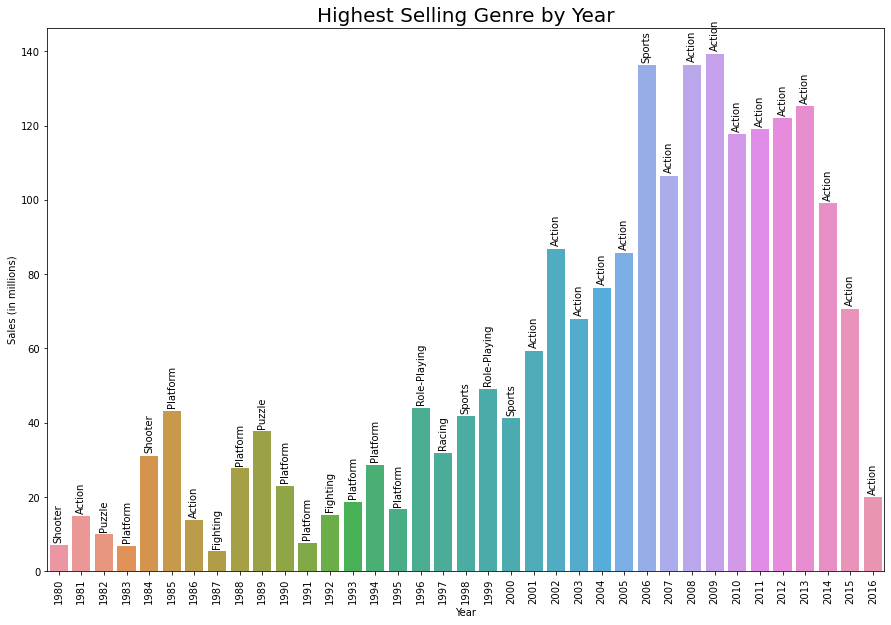

In [17]:
plt.figure(figsize=(15,10))
pgenreyear=sns.barplot(x='Year',y='Global_Sales',ci=None, data=pyg4.reset_index())
pgenreyear.bar_label(pgenreyear.containers[0], labels=pyg4['Genre'], rotation=90, padding=3)
plt.xticks(rotation=90)
plt.title('Most Published Genre by Year', size = 20)
plt.ylabel('Year', size = 10)
plt.ylabel('Count', size = 10)

plt.figure(figsize=(15,10))
genreyear=sns.barplot(x='Year',y='Global_Sales',ci=None, data=syg3.reset_index())
genreyear.bar_label(genreyear.containers[0], labels=syg3['Genre'], rotation=90, padding=3)
plt.xticks(rotation=90)
plt.title('Highest Selling Genre by Year', size = 20)
plt.ylabel('Year', size = 10)
plt.ylabel('Sales (in millions)', size = 10)

In the 1980–1995 period, the genres published were more diverse. By the 1996–2016 period, Sports and Action genres were dominating.

Same goes for sales, but the genres were still pretty diverse during the 1996–1999 period.

In [18]:
gny1=df1.groupby(by=['Genre','Name','Year','Platform'])['Global_Sales'].sum().reset_index()
gny2=gny1.groupby(by=['Genre'])['Global_Sales'].transform(max)==gny1['Global_Sales']
gny3=gny1[gny2].sort_values(by='Global_Sales',ascending=False).reset_index()

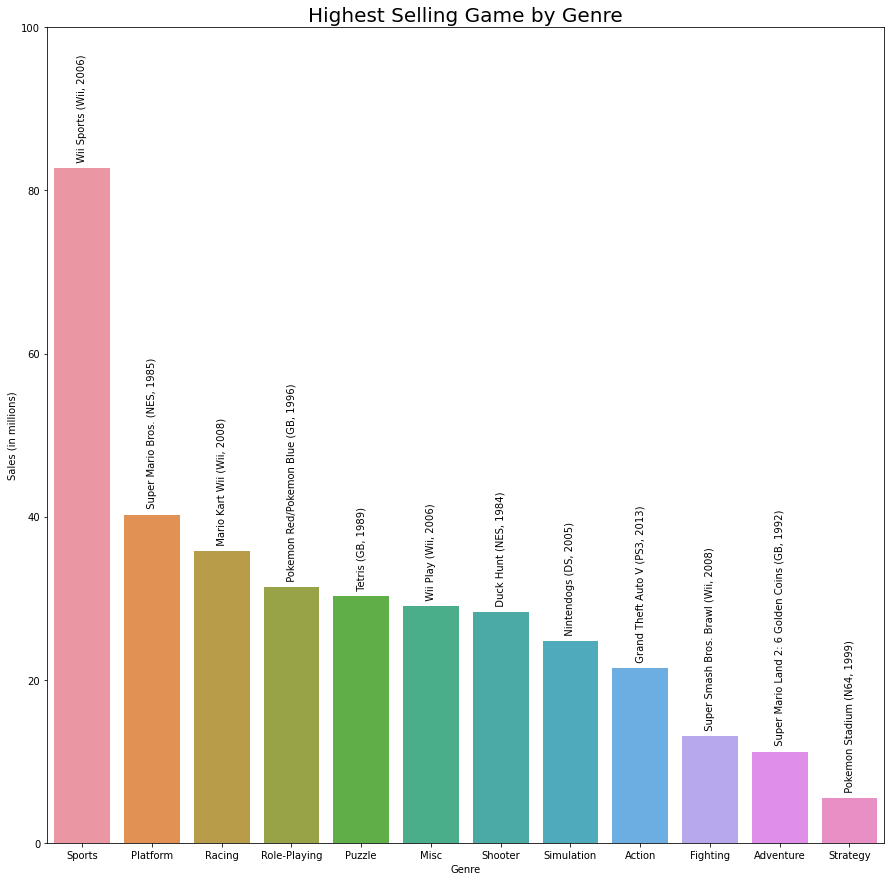

In [19]:
plt.figure(figsize=(15,15))
ax1 = sns.barplot(x='Genre',y='Global_Sales',ci=None, data=gny3.reset_index())
labels = [f'  {gny3.iloc[i, 2]} ({gny3.iloc[i, 4]}, {gny3.iloc[i, 3]})' for i, v in enumerate(ax1.containers[0])]
ax1.bar_label(ax1.containers[0], labels = labels, fontsize = 10, rotation=90)
plt.title('Highest Selling Game by Genre', size = 20)
plt.ylabel('Sales (in millions)', size = 10)
plt.yticks(range(0,120,20))
plt.show()

The top 5 games in the graph are legendary games that are familiar to everyone. Interestingly, the best-selling action game (GTA V) is only in 9th place out of 12, even though action games are dominating the market. The combination of quantity published and a decent sales-to-game quantity ratio is believed to be the key to action games dominance of the market.

In [20]:
pv1 = pd.pivot_table(df1,index=['Genre'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                     aggfunc=lambda x:(x>0).sum())
column_order=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
pv_region = pv1.reindex(column_order, axis=1)

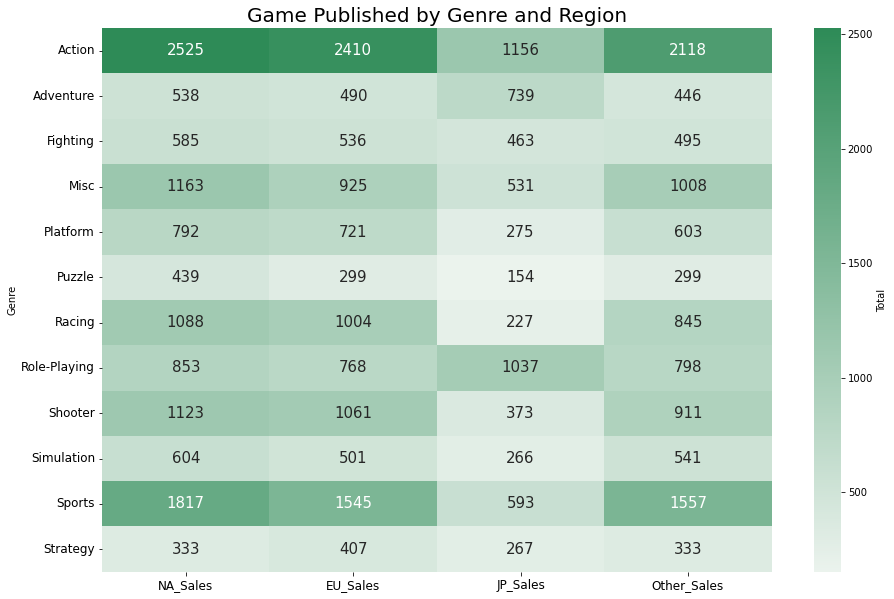

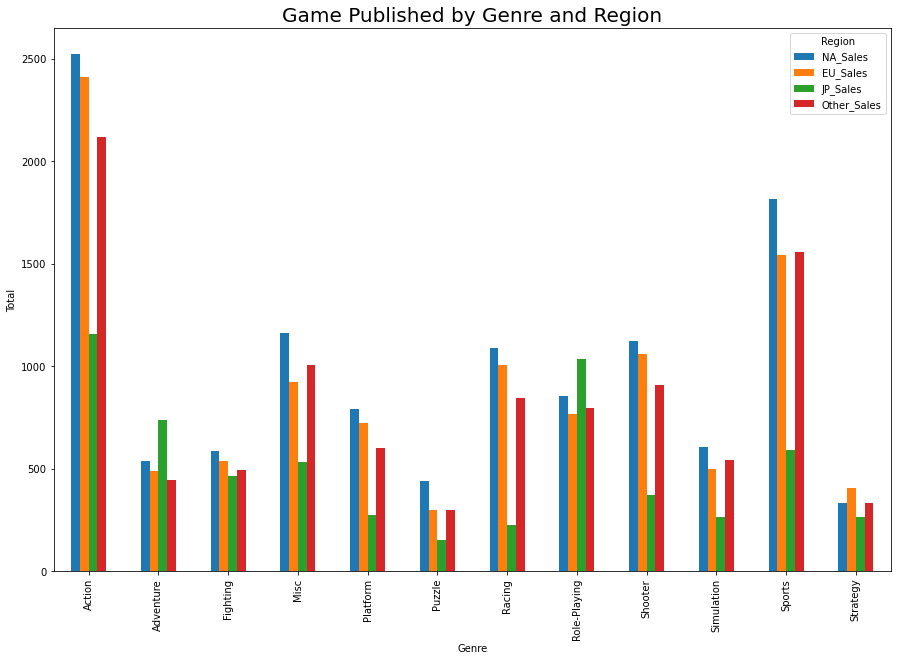

In [21]:
plt.figure(figsize=(15,10))
ax2=sns.heatmap(pv_region,cmap=sns.light_palette("seagreen", as_cmap=True),cbar_kws={'label': 'Total'},
               annot=True,fmt='.0f',annot_kws={"fontsize":15})
plt.title('Game Published by Genre and Region', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

pv_region.plot(kind='bar',figsize=(15,10))
plt.title('Game Published by Genre and Region', size = 20)
plt.ylabel('Total', size = 10)
plt.legend(title='Region')

plt.show()

Action and Sports games are the most published genres in every region except Japan, where Action and Role-Playing games are the most published.

In [22]:
pv2 = pd.pivot_table(df1,index=['Genre'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], aggfunc=sum)
column_order=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
pv_genre = pv2.reindex(column_order, axis=1)

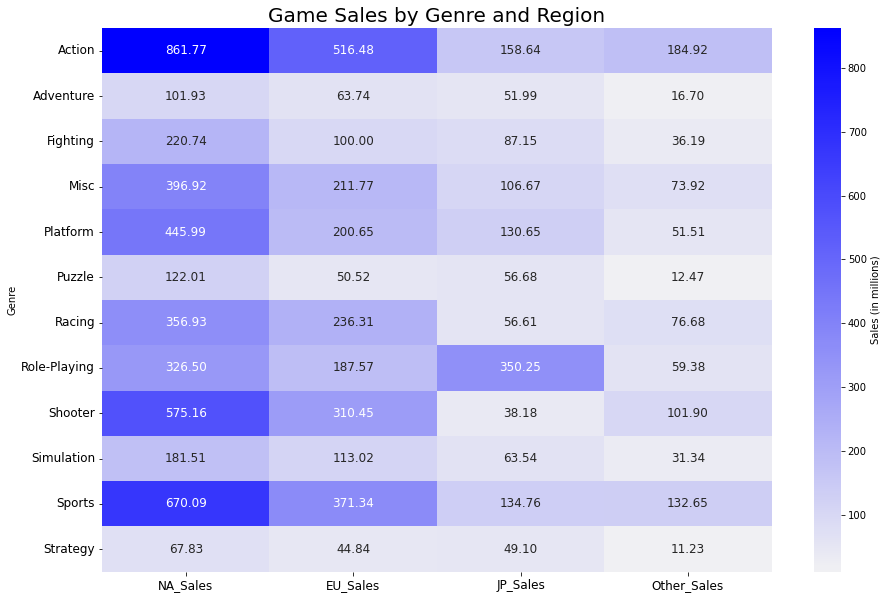

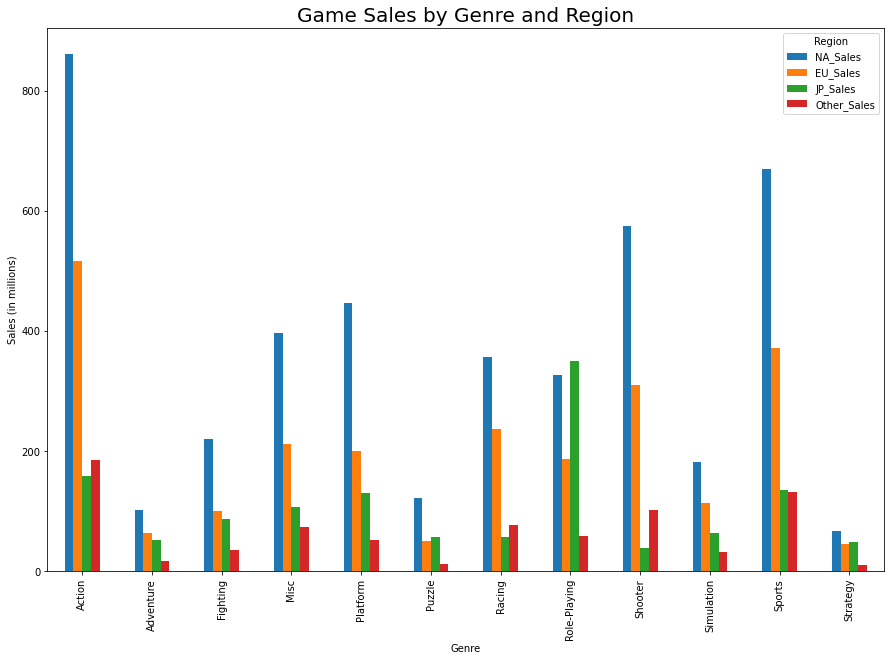

In [23]:
plt.figure(figsize=(15,10))
ax3=sns.heatmap(pv_genre,cmap=sns.color_palette("light:b", as_cmap=True),cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.2f',annot_kws={"fontsize":12})
plt.title('Game Sales by Genre and Region', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

pv_genre.plot(kind='bar',figsize=(15,10))
plt.title('Game Sales by Genre and Region', size = 20)
plt.ylabel('Sales (in millions)', size = 10)
plt.legend(title='Region')

plt.show()

Sales performance is pretty similar to the previous graph. Action and Sports genres are dominating, with Shooter coming close in Western and other markets. Japan is the only unique case where Role-Playing games are dominating the market.

# By Platform

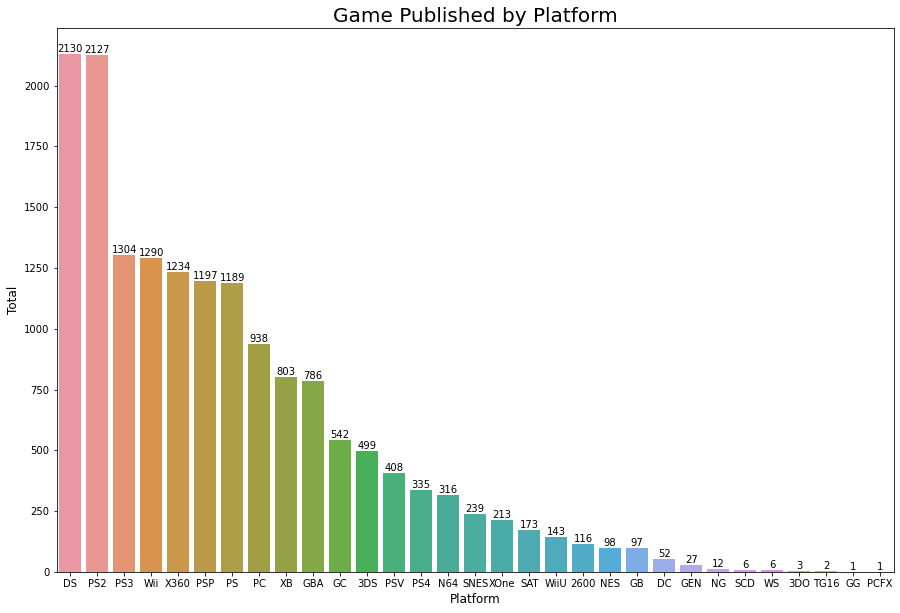

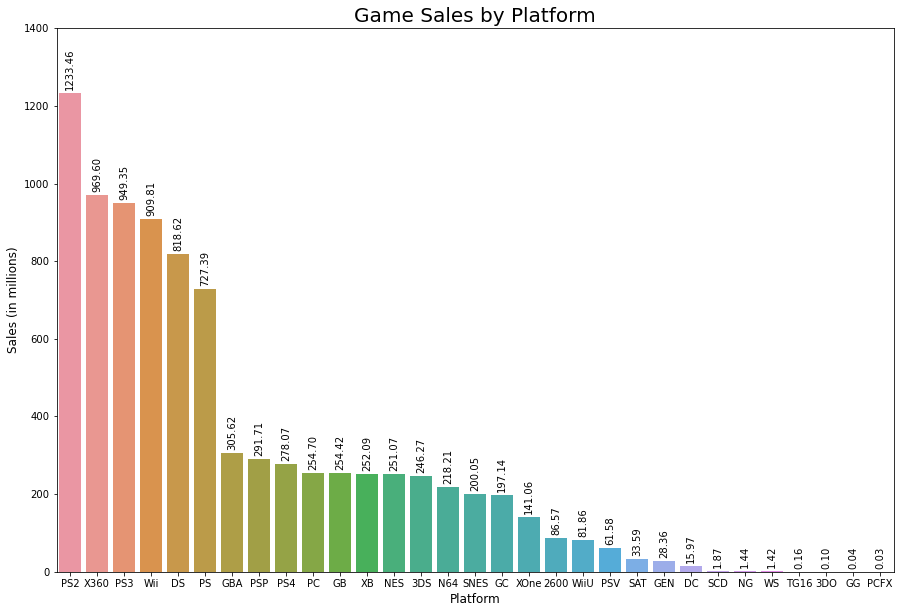

In [24]:
plt.figure(figsize=(15,10))
chart3=sns.countplot(x='Platform',data=df1, order=df1['Platform'].value_counts().index)
chart3.bar_label(chart3.containers[0], label_type='edge')
plt.xlabel('Platform', size = 12)
plt.ylabel('Total', size = 12)
plt.title ('Game Published by Platform', size = 20)

dfp1=df1.groupby(df1['Platform']).sum().sort_values('Global_Sales',ascending=False)
plt.figure(figsize=(15,10))
platformsales=sns.barplot(x='Platform',y='Global_Sales',ci=None, data=dfp1.reset_index())
platformsales.bar_label(platformsales.containers[0], label_type='edge',rotation=90, padding=3,fmt='%.2f')
plt.xlabel('Platform', size = 12)
plt.ylabel('Sales (in millions)', size = 12)
plt.yticks(range(0,1600,200))
plt.title ('Game Sales by Platform', size = 20)

plt.show()

DS and PS2 are the most popular platforms for games by far; most games were published there, followed by PS3, Wii, and X360.

Meanwhile, PS2 games are generating the most sales, followed by X360, PS3, and Wii. Another interesting case is that DS sales occupied 5th place despite most games being released there.

In [25]:
yp1=df1.groupby(by=['Year','Platform'])['Global_Sales'].sum().reset_index()
yp2=yp1.groupby(by=['Year'])['Global_Sales'].transform(max)==yp1['Global_Sales']
yp3=yp1[yp2].reset_index()

Text(0, 0.5, 'Sales (in millions)')

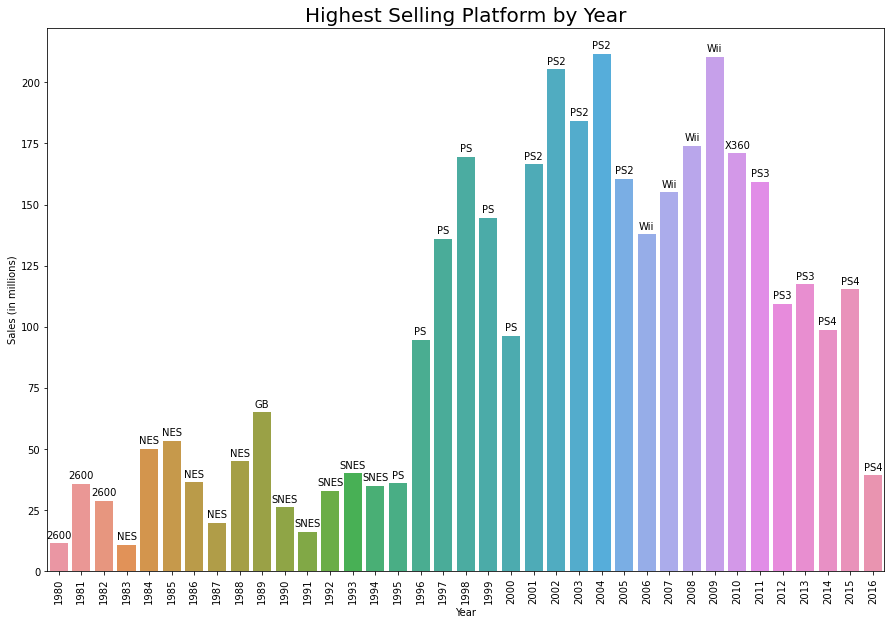

In [26]:
plt.figure(figsize=(15,10))
platformyear=sns.barplot(x='Year',y='Global_Sales',ci=None, data=yp3.reset_index())
platformyear.bar_label(platformyear.containers[0], labels=yp3['Platform'], padding=3)
plt.xticks(rotation=90)
plt.title('Highest Selling Platform by Year', size = 20)
plt.ylabel('Year', size = 10)
plt.ylabel('Sales (in millions)', size = 10)

In the 1980–1982 period, the Atari 2600 dominated the market, especially in North America, thanks to the release of influential games such as Pitfall and Pac-Man. In 1983, a US video game crash happened and pretty much sank the Atari 2600. NES took over and dominated the market until 1987.

Thanks to the release of Tetris, GB claimed first place in 1989, and with the release of the SNES, it took over first place in 1990 and dominated the market until 1994.

Playstation dominance started as early as 1995 and became a big hit until 2016, with the exception of the 2006–2010 period when Wii and X360 took over thanks to the release of popular sports games like Wii Sports and Kinect Adventures.

In [27]:
pv3 = pd.pivot_table(df1,index=['Platform'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                     aggfunc=lambda x:(x>0).sum())
column_order=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
pv_platform = pv3.reindex(column_order, axis=1)

In [28]:
pv4 = pd.pivot_table(df1,index=['Platform'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], aggfunc=sum)
column_order=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
pv_splatform = pv4.reindex(column_order, axis=1)

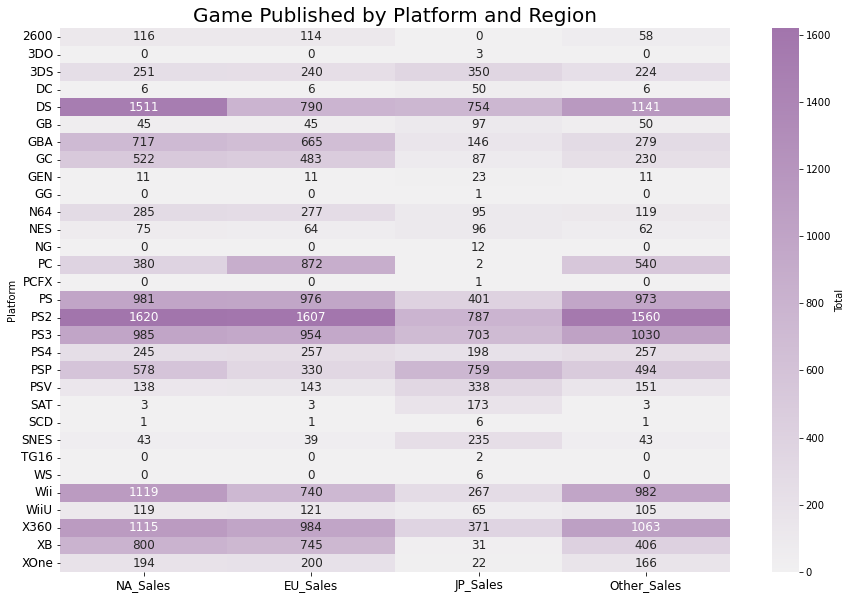

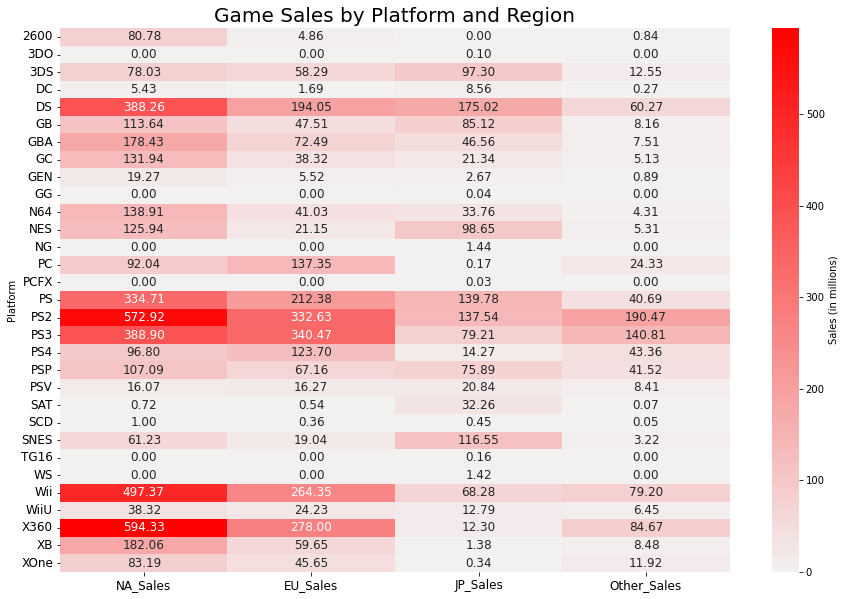

In [29]:
plt.figure(figsize=(15,10))
ax4=sns.heatmap(pv_platform,cmap=sns.light_palette("#a275ac", as_cmap=True),cbar_kws={'label': 'Total'},
               annot=True,fmt='.0f',annot_kws={"fontsize":12})
plt.title('Game Published by Platform and Region', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.figure(figsize=(15,10))
ax5=sns.heatmap(pv_splatform,cmap=sns.color_palette("light:r", as_cmap=True),cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.2f',annot_kws={"fontsize":12})
plt.title('Game Sales by Platform and Region', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

As we can see here, lots of games were released in Western and other regions, with Playstation platforms dominating in most markets while the Xbox Series, Wii, and DS came close.

Same goes for sales, the sales graph imitates the published graph, with Western market sales dominating for every popular platforms. The interesting case here is that Japanese-produced platforms like the Playstation series (PS, PS2, PS3, and PS4) and Wii are commercial successes in every region. Meanwhile, the Xbox Series (X360, XB, and XOne) relied heavily on the Western market, while sales in Japan were pretty much nonexistent.

Now, maybe you wonder why the numbers in the sales graph are not exactly compatible with the Game Published by Platform graph. There are games published on certain platforms, but some of them have zero sales value in certain regions. Zero sales value indicates that the particular game was not even released in that particular region, and I'm not counting that. If one game is released in the NA, EU, and Japan, then I'm counting it as one for each region.

That's the reason why PS2 looked like it had more games in the Game Published by Platform graph, because PS2 games are accessible in most regions, while DS seemed to have more region-exclusive games.

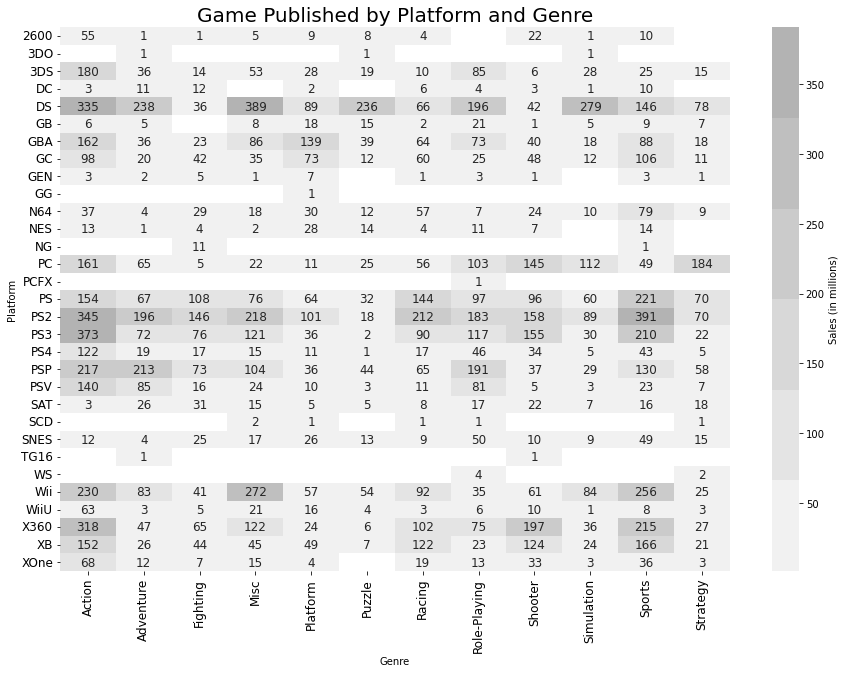

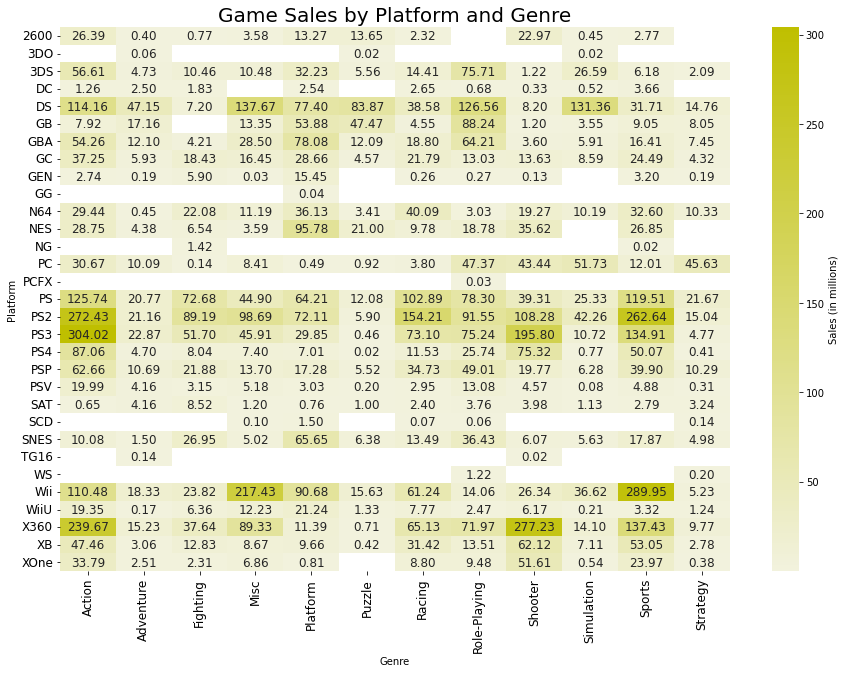

In [30]:
dpg=df1.groupby(by=['Platform','Genre'])['Global_Sales'].count().reset_index()
dpg1=dpg.pivot('Platform','Genre','Global_Sales')
plt.figure(figsize=(15,10))
ax6=sns.heatmap(dpg1,cmap=sns.light_palette(((0.7, 0.7, 0.7))),cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.0f',annot_kws={"fontsize":12})
plt.title('Game Published by Platform and Genre', size = 20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

dpc=df1.groupby(by=['Platform','Genre'])['Global_Sales'].sum().reset_index()
dpc1=dpc.pivot('Platform','Genre','Global_Sales')
plt.figure(figsize=(15,10))
ax7=sns.heatmap(dpc1,cmap=sns.color_palette("light:y", as_cmap=True),cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.2f',annot_kws={"fontsize":12})
plt.title('Game Sales by Platform and Genre', size = 20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.show()

These graphs represent the relationship between platform variables and genre variables.

As we can see, Action and Sports are the most popular genres on almost every popular platform. Other than that, Shooter games are also pretty popular on the Playstation and X360 platforms, while Misc genre is popular on the DS and Wii. There are a significant number of Simulation games that are released on the DS too.

On game sales, Action and Sports genres are contributing the most to sales on popular platforms. There are also a large number of sales on Shooter games on the PS3 and X360 platforms. The Wii also scored a significant number of sales of Misc genre games.

Remember the case from the previous graph when the DS occupied 5th place in terms of sales despite most games being published there? These graphs might answer some of those questions.

DS released a lot of games, but we can see that a significant number of them were of the Misc and Simulation genres. We knew already that those genres are not exactly the most attractive games ever in terms of sales, and that's exactly the case here. Wii also released a lot of Misc games, but the sales were better than DS sales, and Wii sales are also carried by the most popular sports game ever, Wii Sports. Apparently, DS Action and Sports games sales didn't perform that well either compared to the PS2 or PS3 platforms. That's why DS sales were overtaken by other platforms, despite most games being released there.

In [31]:
gp1=df1.groupby(by=['Platform','Name','Year','Genre'])['Global_Sales'].sum().reset_index()
gp2=gp1.groupby(by=['Platform'])['Global_Sales'].transform(max)==gp1['Global_Sales']
gp3=gp1[gp2].sort_values(by='Global_Sales',ascending=False).reset_index()

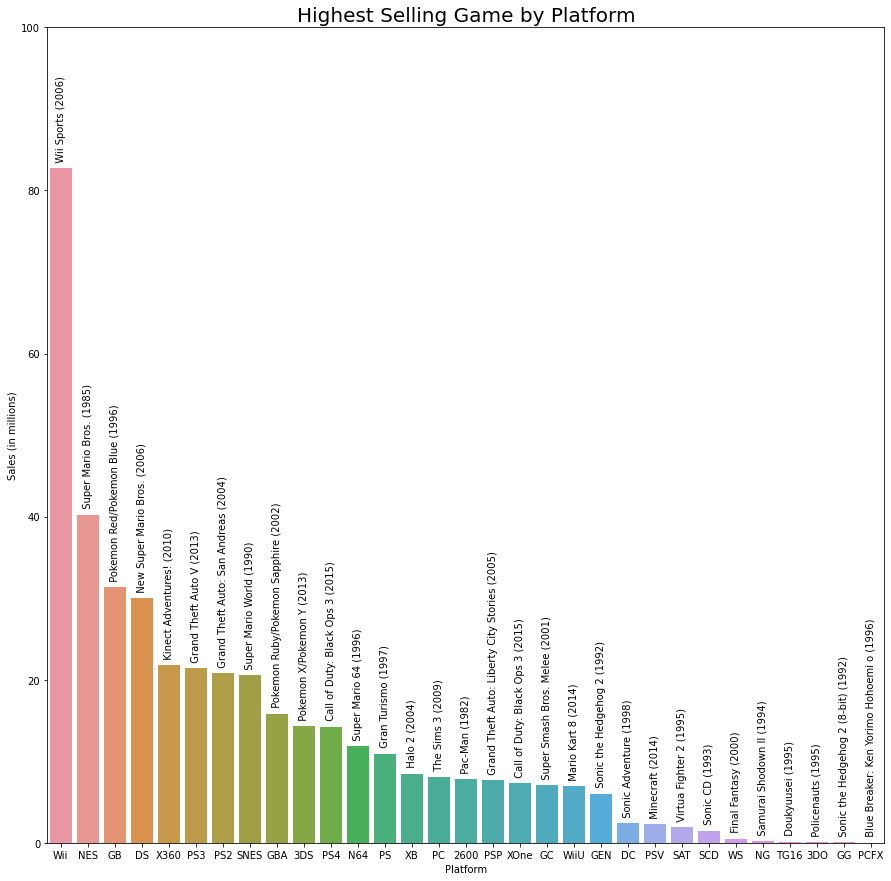

In [32]:
plt.figure(figsize=(15,15))
ax8 = sns.barplot(x='Platform',y='Global_Sales',ci=None, data=gp3.reset_index())
labels = [f'  {gp3.iloc[i, 2]} ({gp3.iloc[i, 3]})' for i, v in enumerate(ax8.containers[0])]
ax8.bar_label(ax8.containers[0], labels = labels, fontsize = 10, rotation=90)
plt.title('Highest Selling Game by Platform', size = 20)
plt.ylabel('Sales (in millions)', size = 10)
plt.yticks(range(0,120,20))
plt.show()

The Highest-selling games here consist of very popular games that most gamers can recognize immediately. Even non-gamers should be able to recognize games such as Wii Sports, Super Mario Bros., and Pac-Man.

Wii Sports (Wii) outperforms everyone by a large margin, followed by Super Mario Bros. (NES) and Pokemon Red/Blue (GB).

# By Publisher

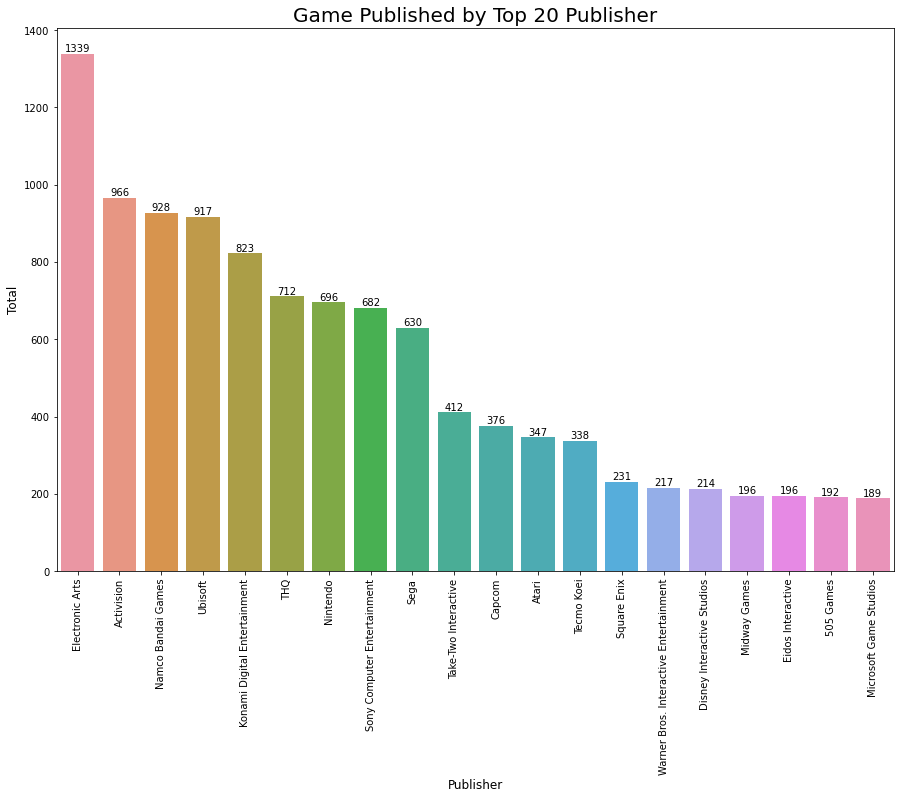

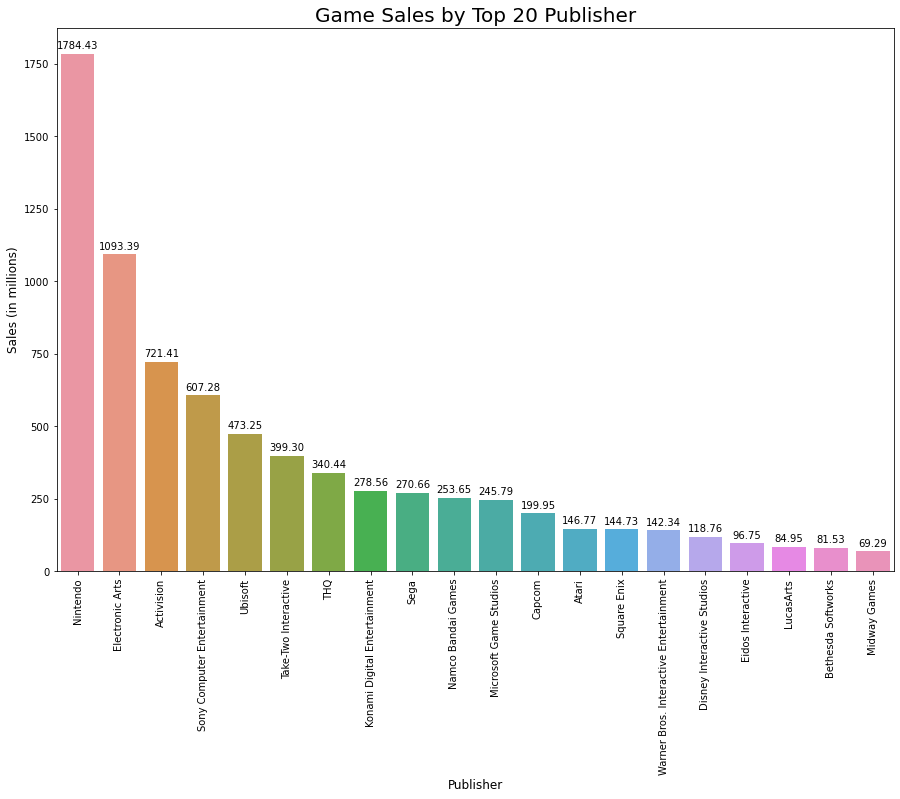

In [33]:
plt.figure(figsize=(15,10))
chart4=sns.countplot(x='Publisher',data=df1, order=df1['Publisher'].value_counts().iloc[:20].index)
chart4.bar_label(chart4.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.xlabel('Publisher', size = 12)
plt.ylabel('Total', size = 12)
plt.title ('Game Published by Top 20 Publisher', size = 20)

dfpb1=df1.groupby(df1['Publisher']).sum().sort_values('Global_Sales',ascending=False).head(20)
plt.figure(figsize=(15,10))
pubsales=sns.barplot(x='Publisher',y='Global_Sales',ci=None, data=dfpb1.reset_index())
pubsales.bar_label(pubsales.containers[0], label_type='edge', padding=3,fmt='%.2f')
plt.xlabel('Publisher', size = 12)
plt.xticks(rotation=90)
plt.ylabel('Sales (in millions)', size = 12)
plt.title ('Game Sales by Top 20 Publisher', size = 20)

plt.show()

Electronic Arts published most of the games and outnumbers everyone by a margin, followed by Activision, Namco, Ubisoft, and Konami.

In terms of sales, Nintendo outperforms everyone by a large margin. Electronic Arts placed in second place, even though they published most of the games, followed by Activision, Sony Computer Entertainment, and Ubisoft.

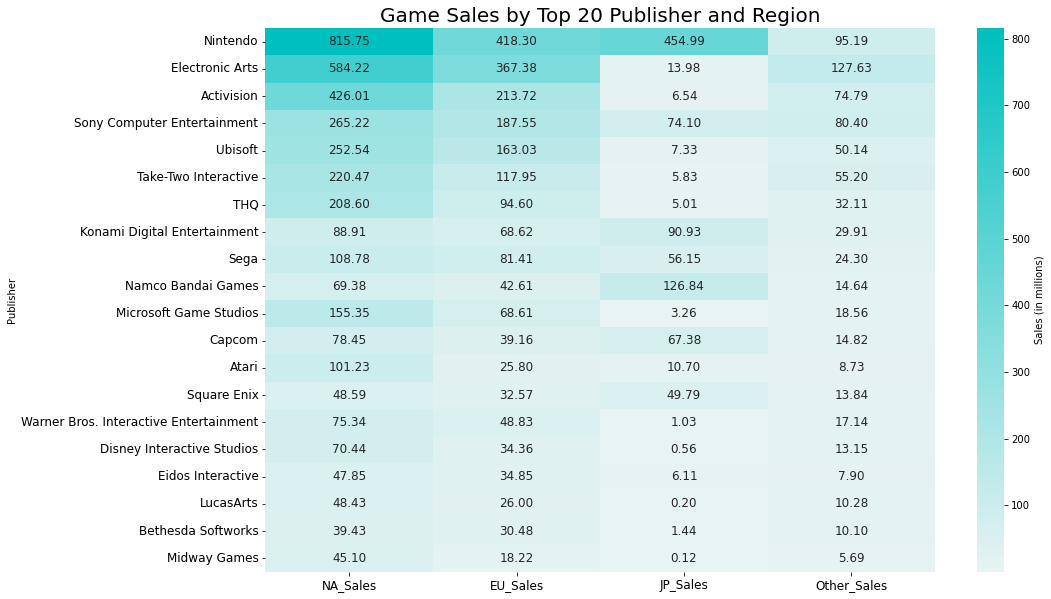

In [34]:
dpb=df1.groupby(by=['Publisher'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum().reset_index().sort_values('Global_Sales',ascending=False).head(20)
dpb.drop('Global_Sales', axis=1, inplace=True)
dpb.set_index('Publisher', inplace=True)
plt.figure(figsize=(15,10))
ax9=sns.heatmap(dpb,cmap=sns.color_palette("light:c", as_cmap=True),cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.2f',annot_kws={"fontsize":12})
plt.title('Game Sales by Top 20 Publisher and Region', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Nintendo is the market leader for every region except *Other region*, by far. Meanwhile, other top five publishers, such as Electronic Arts, Activision, Sony, and Ubisoft, have to rely heavily on the western markets (NA and EU).

Japan is a pretty unique market where Japanese publishers are totally unshakeable. So far, western publishers haven't managed to penetrate the Japanese market yet, while the Japanese publishers are able to enter western markets easily.

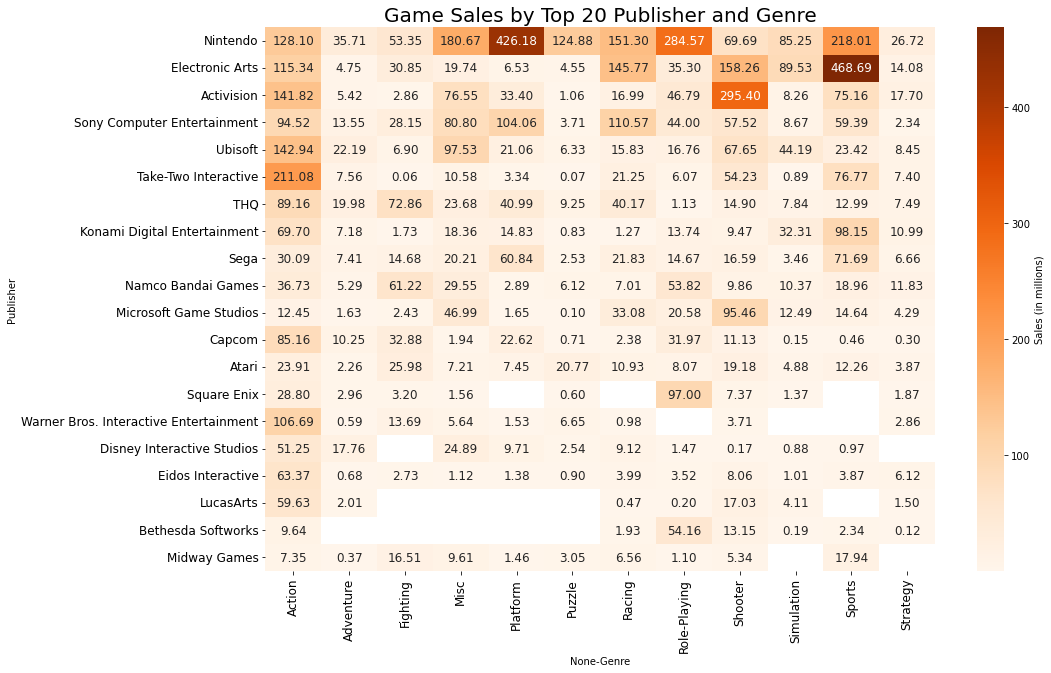

In [35]:
dpar=pd.pivot_table(df1,index=['Publisher'],columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum,margins=True,margins_name='Total')
dpar1=dpar.sort_values(by=('Global_Sales','Total'),ascending=False)
dpar2=dpar1.iloc[1:,:-1].head(20)
plt.figure(figsize=(15,10))
labels=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
ax10=sns.heatmap(dpar2,cmap=sns.color_palette("Oranges", as_cmap=True), cbar_kws={'label': 'Sales (in millions)'},
               annot=True,fmt='.2f',annot_kws={"fontsize":12})
plt.title('Game Sales by Top 20 Publisher and Genre', size = 20)
plt.xticks(fontsize=12)
ax10.set_xticklabels(labels)
plt.yticks(fontsize=12)
plt.show()

We can see Nintendo sales are mostly carried by Platform games. Nintendo also managed to sold considerable number of Sports and Role-Playing games. Electronic Arts sales in the second place, are mostly carried by Sports games, followed by Activision who managed to sell a lot of Shooter games.

Interestingly, despite Action games general popularity, the genre that the top four publishers (Nintendo, Electronic Arts, Activision, and Sony) sold the most of was not Action.

In [36]:
gpu1=df1.groupby(by=['Publisher','Platform','Name','Year'])['Global_Sales'].sum().reset_index()
gpu2=gpu1.groupby(by=['Publisher'])['Global_Sales'].transform(max)==gpu1['Global_Sales']
gpu3=gpu1[gpu2].sort_values(by='Global_Sales',ascending=False).reset_index().head(20)

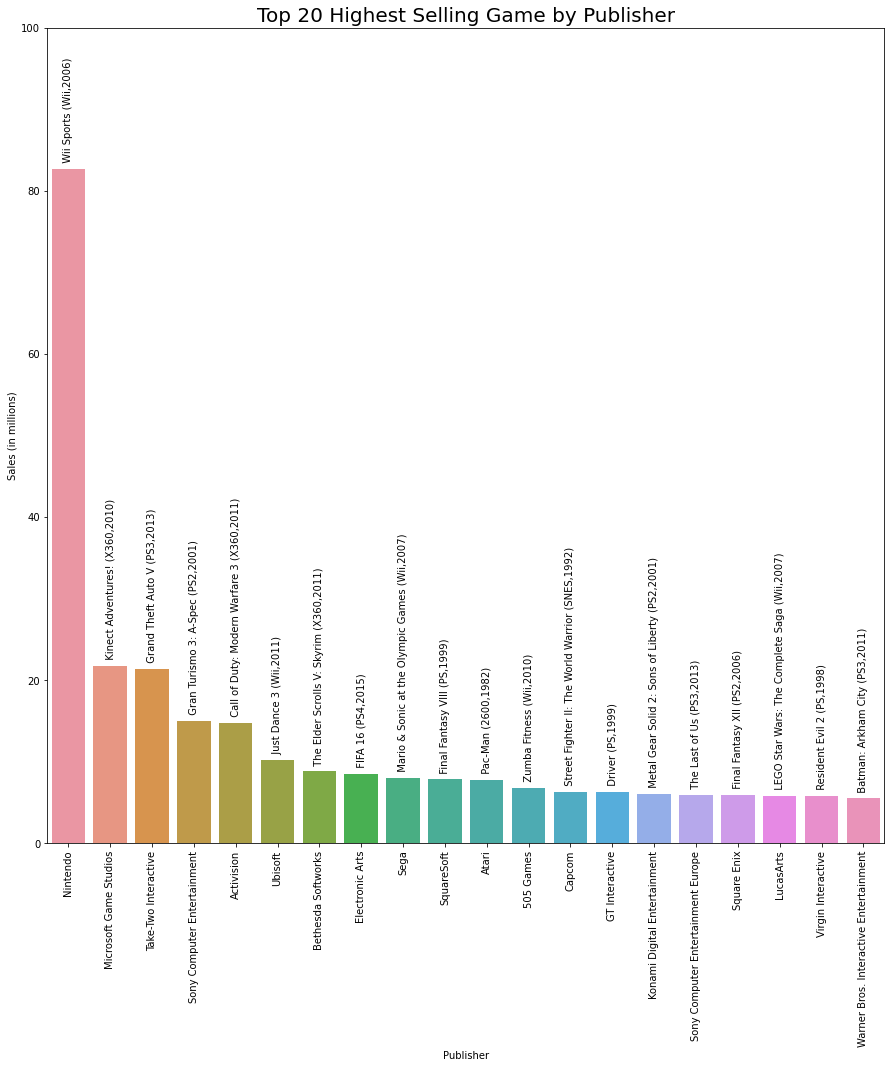

In [37]:
plt.figure(figsize=(15,15))
ax11 = sns.barplot(x='Publisher',y='Global_Sales',ci=None, data=gpu3.reset_index())
labels = [f'  {gpu3.iloc[i, 3]} ({gpu3.iloc[i, 2]},{gpu3.iloc[i, 4]})' for i, v in enumerate(ax11.containers[0])]
ax11.bar_label(ax11.containers[0], labels = labels, fontsize = 10, rotation=90)
plt.title('Top 20 Highest Selling Game by Publisher', size = 20)
plt.xticks(rotation=90)
plt.ylabel('Sales (in millions)', size = 10)
plt.yticks(range(0,120,20))
plt.show()

Nintendo outperforms the second place by four times the value with Wii Sports. In second place, Microsoft followed with another Sports game, Kinect Adventures. Closely in third place, Take-Two followed with Grand Theft Auto V.